In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df=pd.read_csv("cybersecurity_attacks.csv")
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [71]:
df.describe()

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


In [72]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


Malware Indicators    20000
Alerts/Warnings       20067
Proxy Information     19851
Firewall Logs         19961
IDS/IPS Alerts        20050
dtype: int64

In [73]:
#checking the column type for the columns which have missing values
print(df["Proxy Information"].unique())
print(df["Firewall Logs"].unique(),df["Malware Indicators"].unique(),df["IDS/IPS Alerts"].unique(),df["Alerts/Warnings"].unique())

['150.9.97.135' nan '114.133.48.179' ... '60.51.30.46' '137.76.130.8'
 '112.169.115.139']
['Log Data' nan] ['IoC Detected' nan] [nan 'Alert Data'] [nan 'Alert Triggered']


In [77]:
df['Firewall Logs'] = df['Firewall Logs'].fillna('No Log')
df['IDS/IPS Alerts'] = df['IDS/IPS Alerts'].fillna('No Alert')
df['Alerts/Warnings'] = df['Alerts/Warnings'].fillna('No Alert')
df['Malware Indicators'] = df['Malware Indicators'].fillna('No Data')

df=df.drop('Proxy Information', axis=1)
df.isnull().sum()

Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64

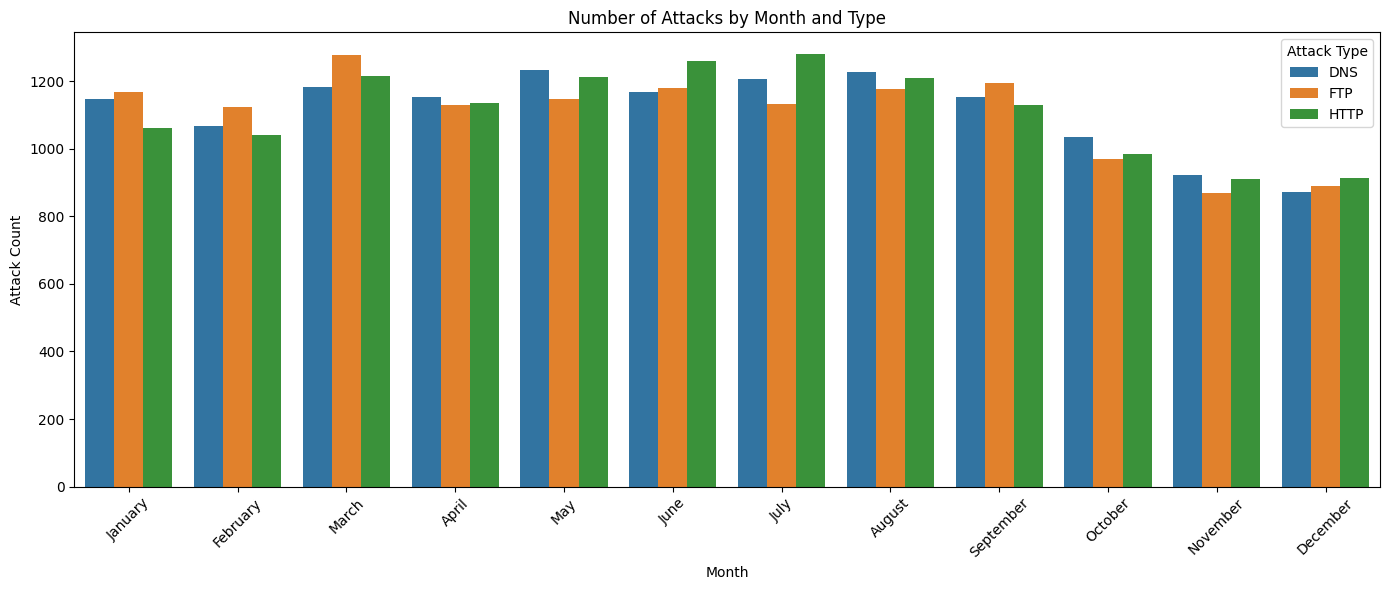


 Month with Most Attacks: March
 Total Attacks in March: 3678

Attack Type Breakdown for March:
Traffic Type  Count
         FTP   1277
        HTTP   1217
         DNS   1184


In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['Month Name'] = df['Timestamp'].dt.strftime('%B')
attack_summary = df.groupby(['Month Name', 'Traffic Type']).size().reset_index(name='Count')

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
attack_summary['Month Name'] = pd.Categorical(attack_summary['Month Name'], categories=month_order, ordered=True)

plt.figure(figsize=(14, 6))
sns.barplot(data=attack_summary, x='Month Name', y='Count', hue='Traffic Type')
plt.title('Number of Attacks by Month and Type')
plt.ylabel('Attack Count')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend(title='Attack Type')
plt.tight_layout()
plt.show()

month_totals = attack_summary.groupby('Month Name')['Count'].sum()
most_attacks_month = month_totals.idxmax()
most_attacks_count = month_totals.max()

print(f"\n Month with Most Attacks: {most_attacks_month}")
print(f" Total Attacks in {most_attacks_month}: {most_attacks_count}")
month_attack_details = attack_summary[attack_summary['Month Name'] == most_attacks_month]
print(f"\nAttack Type Breakdown for {most_attacks_month}:")
print(month_attack_details[['Traffic Type', 'Count']].sort_values(by='Count', ascending=False).to_string(index=False))

In [79]:
print("\nTotal Attacks per Month:")
print(month_totals.to_string())


Total Attacks per Month:
Month Name
January      3378
February     3232
March        3678
April        3421
May          3595
June         3609
July         3623
August       3615
September    3482
October      2989
November     2703
December     2675


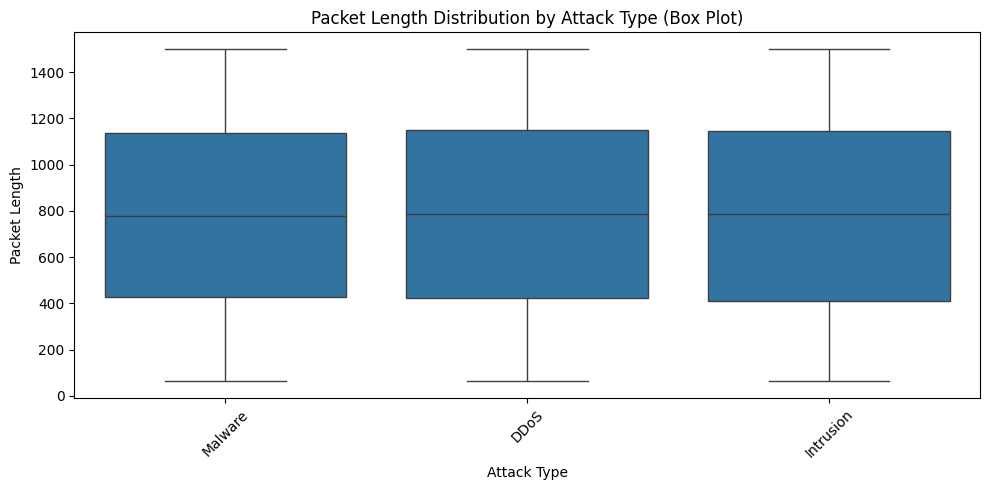

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Attack Type', y='Packet Length')
plt.title("Packet Length Distribution by Attack Type (Box Plot)")
plt.xlabel("Attack Type")
plt.ylabel("Packet Length")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Detected Devices:
Device Information
Windows      17953
Linux         8840
Macintosh     5813
iPhone        4223
Android       1620
Name: count, dtype: int64


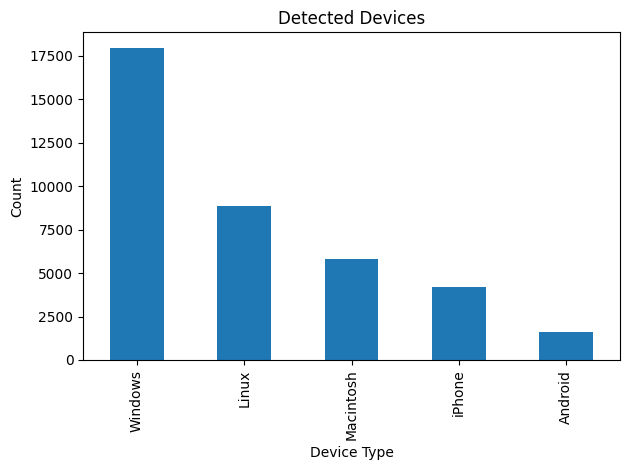

In [80]:
device_counts = df['Device Information'].str.extract(r'(Windows|Macintosh|Linux|Android|iPhone)', expand=False).value_counts()
print("Detected Devices:")
print(device_counts)

device_counts.plot(kind='bar')
plt.title("Detected Devices")
plt.ylabel("Count")
plt.xlabel("Device Type")
plt.tight_layout()
plt.show()

Log Source vs Severity Level Counts:
Severity Level  High   Low  Medium
Log Source                        
Firewall        6811  6570    6735
Server          6571  6613    6700


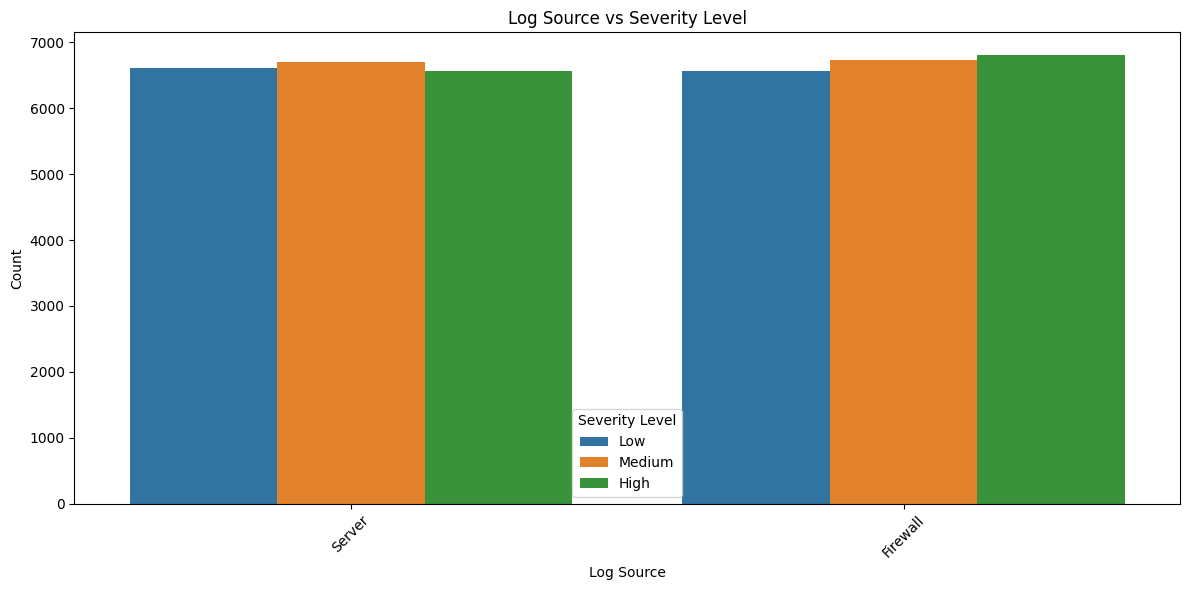

In [ ]:
logsource_severity_counts = pd.crosstab(df['Log Source'], df['Severity Level'])

print("Log Source vs Severity Level Counts:")
print(logsource_severity_counts)

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Log Source', hue='Severity Level')
plt.title("Log Source vs Severity Level")
plt.xlabel("Log Source")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Overall Average Packet Length: 781.45 bytes
Average Packet Length by Attack Type:
Attack Type
DDoS         785.348749
Intrusion    780.924387
Malware      778.047945
Name: Packet Length, dtype: float64


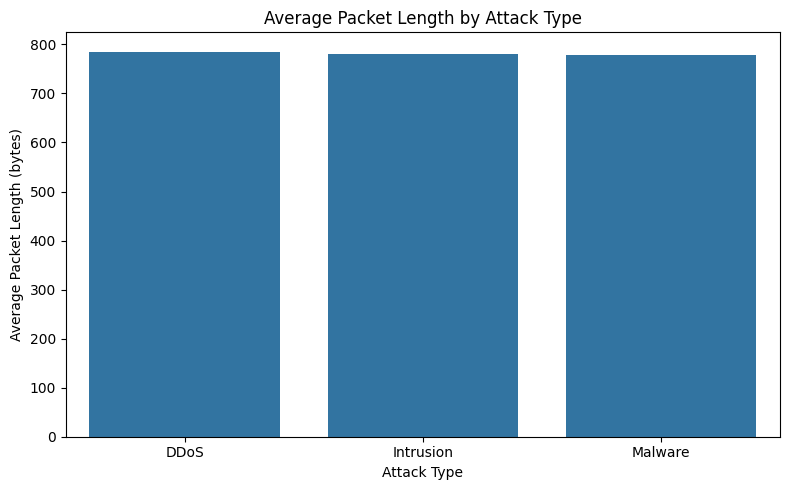

In [81]:
overall_avg_attack = df['Packet Length'].mean()
min_packet_len_attack = df['Packet Length'].min()
max_packet_len_attack = df['Packet Length'].max()
print(f"Overall Average Packet Length: {overall_avg_attack:.2f} bytes")
avg_by_attack = df.groupby('Attack Type')['Packet Length'].mean().sort_values(ascending=False)
print("Average Packet Length by Attack Type:")
print(avg_by_attack)

plt.figure(figsize=(8, 5))
sns.barplot(y=avg_by_attack.values, x=avg_by_attack.index)
plt.title("Average Packet Length by Attack Type")
plt.xlabel("Attack Type")
plt.ylabel("Average Packet Length (bytes)")
plt.tight_layout()
plt.show()

 Action Taken vs Severity Level

Severity Level  High   Low  Medium
Action Taken                      
Blocked         4530  4481    4518
Ignored         4460  4409    4407
Logged          4392  4293    4510


<Figure size 1400x2000 with 0 Axes>

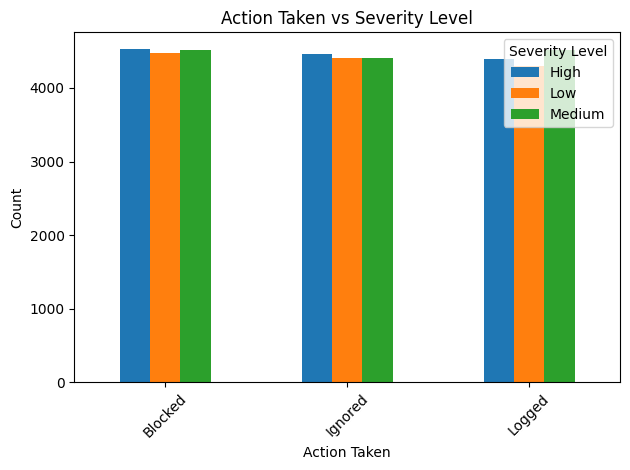

In [57]:
crosstab_result = pd.crosstab(df['Action Taken'], df['Severity Level'])

print(" Action Taken vs Severity Level\n")
print(crosstab_result)
action_severity_counts = df.groupby(['Action Taken', 'Severity Level']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 20))
action_severity_counts.plot(kind='bar', stacked=False)
plt.title("Action Taken vs Severity Level")
plt.xlabel("Action Taken")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Severity Level')
plt.tight_layout()
plt.show()

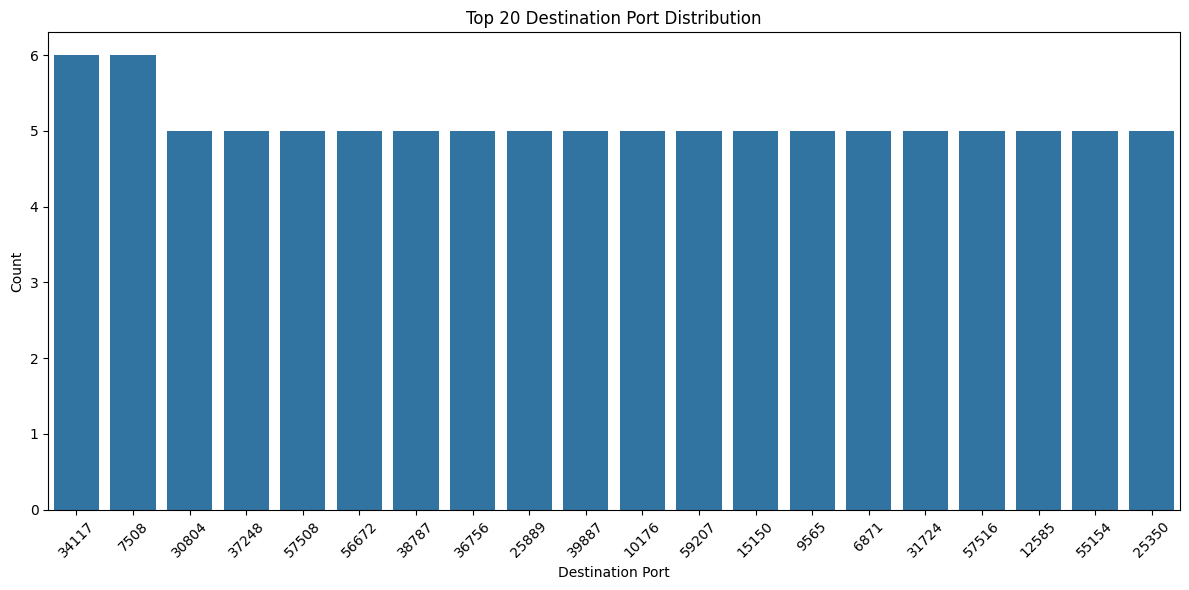

In [61]:
plt.figure(figsize=(12, 6))
top_ports = df['Destination Port'].value_counts().head(20)
sns.barplot(x=top_ports.index.astype(str), y=top_ports.values)
plt.title("Top 20 Destination Port Distribution")
plt.xlabel("Destination Port")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 10 Geo-locations:
 Geo-location Data
Ghaziabad, Meghalaya              16
Kalyan-Dombivli, Jharkhand        15
Ghaziabad, Uttarakhand            14
Ghaziabad, Tripura                14
Kottayam, Nagaland                13
Srikakulam, Uttarakhand           13
Aurangabad, Nagaland              13
Yamunanagar, Arunachal Pradesh    13
Motihari, Odisha                  13
Amroha, Sikkim                    13
Name: count, dtype: int64


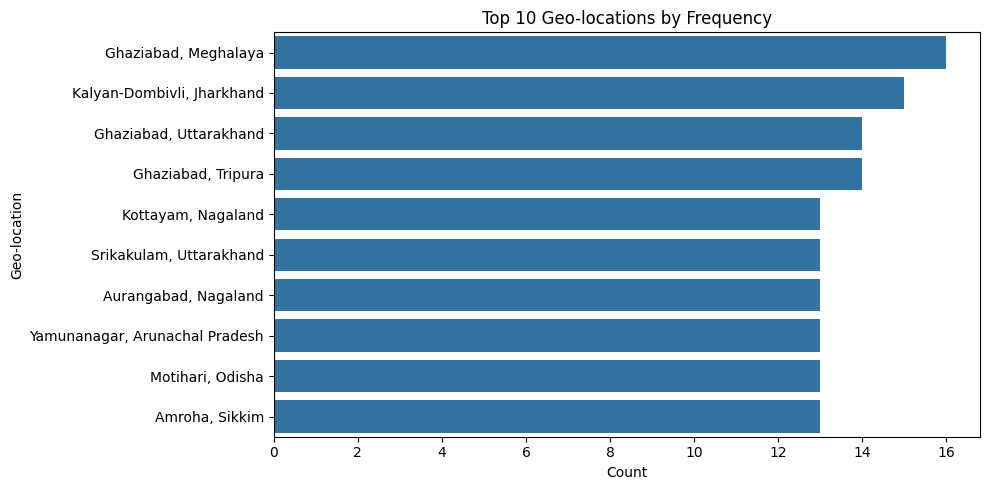

In [84]:
top_geo = df['Geo-location Data'].value_counts().head(10)
print("Top 10 Geo-locations:\n", top_geo)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_geo.values, y=top_geo.index)
plt.title("Top 10 Geo-locations by Frequency")
plt.xlabel("Count")
plt.ylabel("Geo-location")
plt.tight_layout()
plt.show()

Packet Type Counts:
Packet Type
Control    20237
Data       19763
Name: count, dtype: int64


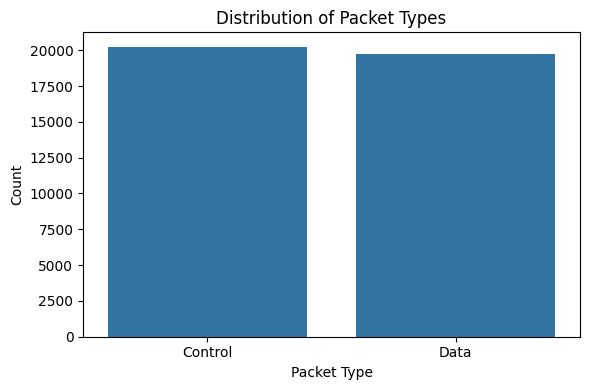

In [ ]:
packet_type_counts = df['Packet Type'].value_counts()
print("Packet Type Counts:")
print(packet_type_counts)

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Packet Type', order=packet_type_counts.index)
plt.title("Distribution of Packet Types")
plt.xlabel("Packet Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()